# Cherry Blossoms!

If we travel back in time a few months, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were in full bloom! We don't live in Japan or DC, but we do have our fair share of the trees - buuut you sadly missed [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2019).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's a little out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
df = pd.read_excel('KyotoFullFlower7.xls')

## 1. Read in the file using pandas, and look at the first five rows

In [2]:
df = pd.read_excel('KyotoFullFlower7.xls')
df.head(5)

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [3]:
df = pd.read_excel('KyotoFullFlower7.xls', skiprows=25)
df.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 3. Look at the final five rows of the data

In [4]:
df.tail(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [5]:
df['Reference Name'] = df['Reference Name'].replace(['-'], np.nan)

In [6]:
df['Reference Name']

0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
5                          NaN
6                          NaN
7                          NaN
8                          NaN
9                          NaN
10                         NaN
11                  NIHON-KOKI
12                         NaN
13                         NaN
14                  NIHON-KOKI
15                         NaN
16                         NaN
17                         NaN
18                         NaN
19                         NaN
20                         NaN
21                         NaN
22                         NaN
23                         NaN
24                         NaN
25                         NaN
26                         NaN
27                         NaN
28                         NaN
29                         NaN
                 ...          
1185    NEWS-PAPER(ARASHIYAMA)
1186    

## 4. What source is the most common as a reference?

In [7]:
df['Reference Name'].value_counts(dropna=True).head(1)

NEWS-PAPER(ARASHIYAMA)    94
Name: Reference Name, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [8]:
df = df.dropna(subset=['Full-flowering date (DOY)'])
df

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
63,864,100.0,409.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU
65,866,106.0,416.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU
68,869,95.0,405.0,5.0,2.0,KANKE-BUNSOU
88,889,104.0,414.0,5.0,2.0,NIPPON-SANDAI-JITSUROKU
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU


# 7. Make a histogram of the full-flowering date

Is it not showing up? Remember the "magic" command that makes graphs show up in matplotlib notebooks!

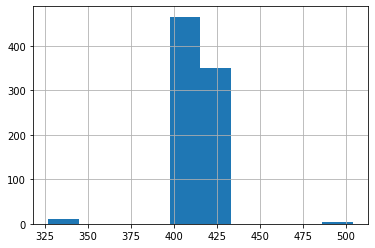

In [9]:
df['Full-flowering date'].hist(bins=10)

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

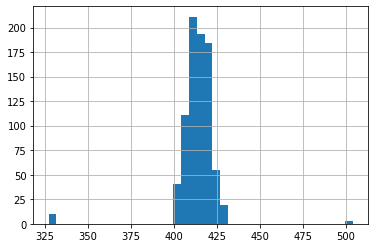

In [10]:
df['Full-flowering date'].hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [11]:
df['Full-flowering date'].describe()

count    827.000000
mean     413.717050
std       12.381731
min      327.000000
25%      410.000000
50%      414.000000
75%      419.000000
max      504.000000
Name: Full-flowering date, dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [12]:
b4_1900 = df[df['AD'] < 1900]

b4_1900['Full-flowering date (DOY)'].mean()

105.20728291316527

## 11. How about after 1900?

In [13]:
a_1900 = df[df['AD'] > 1900]

a_1900['Full-flowering date (DOY)'].mean()

100.3125

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [14]:
japan_6 = df[df['Source code'] == 6.0]
japan_6.describe()
 # 9 counts of source code == 6.0

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code
count,9.000000,9.000000,9.000000,9.0,9.000000
mean,1475.888889,101.000000,410.666667,6.0,2.444444
std,390.736626,6.403124,6.284903,0.0,1.740051
min,1048.000000,92.000000,402.000000,6.0,0.000000
25%,1182.000000,95.000000,405.000000,6.0,1.000000
50%,1268.000000,103.000000,412.000000,6.0,3.000000
75%,1769.000000,105.000000,415.000000,6.0,4.000000
max,2009.000000,112.000000,421.000000,6.0,4.000000


In [15]:
japan_7 = df[df['Source code'] == 7.0]
japan_7.describe()

#  40 counts of source code == 7.0

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code
count,40.000000,40.000000,40.000000,40.0,40.000000
mean,1592.475000,103.675000,411.725000,7.0,3.025000
std,322.569252,6.199204,14.801226,0.0,2.877744
min,991.000000,87.000000,327.000000,7.0,0.000000
25%,1315.500000,100.000000,409.750000,7.0,1.000000
50%,1673.000000,104.000000,413.500000,7.0,2.000000
75%,1870.250000,108.250000,418.000000,7.0,4.000000
max,2010.000000,114.000000,424.000000,7.0,9.000000


In [16]:
print('40 + 9 = 49 times where source code is 6.0 or 7.0')

40 + 9 = 49 times where source code is 6.0 or 7.0


## 13. Show only the years where our data was from a title in Japanese poetry

In [17]:
japan_6.AD

247     1048
260     1061
381     1182
464     1265
467     1268
872     1673
968     1769
1207    2008
1208    2009
Name: AD, dtype: int64

In [18]:
japan_7.AD

190      991
245     1046
249     1050
270     1071
272     1073
350     1151
419     1220
435     1236
461     1262
474     1275
528     1329
529     1330
571     1372
579     1380
666     1467
725     1526
773     1574
860     1661
866     1667
868     1669
876     1677
878     1679
1055    1856
1057    1858
1059    1860
1060    1861
1064    1865
1067    1868
1068    1869
1069    1870
1070    1871
1072    1873
1073    1874
1074    1875
1075    1876
1077    1878
1141    1942
1142    1943
1143    1944
1209    2010
Name: AD, dtype: int64

## 14. Graph the full-flowering date (DOY) over time

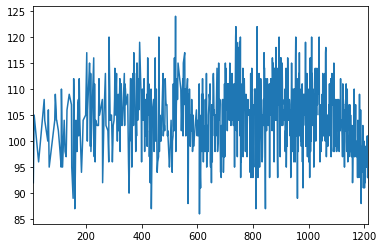

In [19]:
df['Full-flowering date (DOY)'].plot(y=df['Full-flowering date (DOY)'], x=df['AD'])


## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [20]:
df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail()

1210    95.9
1211    96.9
1212    96.4
1213    96.6
1214    96.0
Name: Full-flowering date (DOY), dtype: float64

C:\Users\Shaleen\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


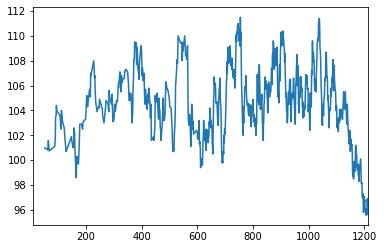

In [21]:
df.rolling_date = df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean()

df.rolling_date.plot(x=df['AD'], y=df['Full-flowering date (DOY)'])


Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

**I've given you March as an example**, you just need to add in two more lines to do April and May.

In [33]:
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'

In [34]:
df.loc[df['Full-flowering date'] >= 400, 'month'] = 'April'

In [35]:
df.loc[df['Full-flowering date'] >= 500, 'month'] = 'May'

### 17. Using your new column, how many blossomings happened in each month?

In [46]:
month_counts = df.month.value_counts()

df.month_counts = month_counts

### 18. Graph how many blossomings happened in each month.

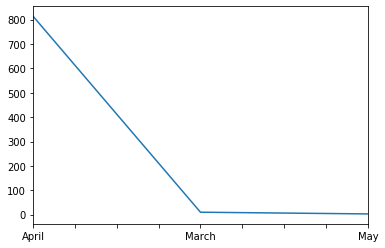

In [47]:
df.month_counts.plot(x='month', y='month_counts')

## 19. Adding a day-of-month column

Now we're going to add a new column called "day of month." It's actually a little tougher than it should be since the `Full-flowering date` column is a *float* instead of an integer.

In [48]:
df['Full-flowering date'].astype(int)

11      401
14      415
30      406
50      418
52      414
63      409
65      416
68      405
88      414
90      419
91      417
93      416
94      414
95      413
101     412
107     407
111     404
112     420
116     405
122     414
125     408
129     407
132     416
140     419
148     417
149     405
154     330
156     422
157     419
158     407
       ... 
1185    412
1186    405
1187    415
1188    403
1189    329
1190    407
1191    403
1192    407
1193    409
1194    409
1195    412
1196    407
1197    401
1198    404
1199    409
1200    406
1201    401
1202    408
1203    401
1204    409
1205    408
1206    407
1207    404
1208    405
1209    405
1210    409
1211    410
1212    403
1213    404
1214    403
Name: Full-flowering date, Length: 827, dtype: int32

And if you try to convert it to an int, **pandas yells at you!**

In [ ]:
# No it doesn't. I already dropped Null values. I don't like them. :D

That's because, as you can read, you can't have an `NaN` be an integer. But, for some reason, it *can* be a float. Ugh! So what we'll do is **drop all of the na values, then convert them to integers to get rid of the decimals.**

I'll show you the first 5 here.

In [ ]:
# Already done.

On the next line, I take the first character of the row and add a bunch of exclamation points on it. I want you to edit this code to **return the last TWO digits of the number**. This only shows you the first 5, by the way.

You might want to look up 'list slicing.'

In [49]:
df['Full-flowering date'].dropna().astype(int).astype(str).apply(lambda value: value [1] + value[2]).head()

11    01
14    15
30    06
50    18
52    14
Name: Full-flowering date, dtype: object

Now that you've successfully extracted the last two letters, save them into a new column called `'day-of-month'`

In [50]:
day_of_month = df['Full-flowering date'].dropna().astype(int).astype(str).apply(lambda value: value [1] + value[2])

In [61]:
df['day_of_month'] = day_of_month

### 20. Adding a date column

Now take the `'month'` and `'day-of-month'` columns and combine them in order to create a new column called `'date'`

In [62]:
df['date'] = df['month'] + df['day_of_month']

In [63]:
df

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,month,day_of_month,date
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,April,01,April01
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,April,15,April15
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,April,06,April06
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,April,18,April18
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,April,14,April14
63,864,100.0,409.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU,April,09,April09
65,866,106.0,416.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU,April,16,April16
68,869,95.0,405.0,5.0,2.0,KANKE-BUNSOU,April,05,April05
88,889,104.0,414.0,5.0,2.0,NIPPON-SANDAI-JITSUROKU,April,14,April14
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU,April,19,April19


# YOU ARE DONE.

And **incredible.**